Average Monthly Household Income from Work Per Household Member (Including Employer CPF Contributions) Among Resident Employed Households By Type of Dwelling: https://tablebuilder.singstat.gov.sg/table/CT/17724 (avg income per member.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
avg_income = pd.read_csv('avg income per member.csv')
avg_income.tail()

,Year,HDB 1- & 2- Room Flats,HDB 3-Room Flats,HDB 4-Room Flats,HDB 5-Room & Executive Flats,Condominiums & Other Apartments,Landed Properties
17,2017,1318,2627,2917,3587,7195,6313
18,2018,1419,2698,3065,3672,7438,6319
19,2019,1566,2864,3204,3791,7471,6538
20,2020,1598,2809,3171,3721,7254,6441
21,2021,1745,3040,3236,3881,7482,6275


In [3]:
avg_income = avg_income.swapaxes("index", "columns")
avg_income.columns = avg_income.iloc[0]
avg_income.drop(['Year'], inplace=True)
avg_income

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
HDB 1- & 2- Room Flats,876,803,807,773,811,811,812,775,854,858,...,978,976,1019,1224,1299,1318,1419,1566,1598,1745
HDB 3-Room Flats,1344,1455,1352,1416,1404,1486,1471,1612,1820,1806,...,2183,2216,2317,2512,2599,2627,2698,2864,2809,3040
HDB 4-Room Flats,1305,1414,1390,1362,1358,1432,1492,1632,1835,1833,...,2304,2415,2519,2718,2831,2917,3065,3204,3171,3236
HDB 5-Room & Executive Flats,1880,2074,2044,1985,1929,2055,2088,2252,2545,2469,...,2929,3086,3232,3367,3423,3587,3672,3791,3721,3881
Condominiums & Other Apartments,4035,4524,4173,4228,3961,4411,4758,5214,5467,5500,...,6564,6640,6788,7356,7186,7195,7438,7471,7254,7482
Landed Properties,3350,3641,3563,3441,3757,3477,3924,4604,4882,4687,...,5962,5614,6414,5888,6198,6313,6319,6538,6441,6275


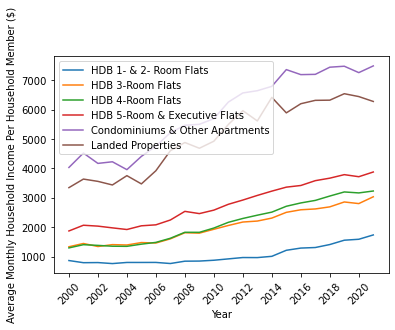

In [4]:
plt.plot(avg_income.loc['HDB 1- & 2- Room Flats'], label='HDB 1- & 2- Room Flats')
plt.plot(avg_income.loc['HDB 3-Room Flats'], label='HDB 3-Room Flats')
plt.plot(avg_income.loc['HDB 4-Room Flats'], label='HDB 4-Room Flats')
plt.plot(avg_income.loc['HDB 5-Room & Executive Flats'], label='HDB 5-Room & Executive Flats')
plt.plot(avg_income.loc['Condominiums & Other Apartments'], label='Condominiums & Other Apartments')
plt.plot(avg_income.loc['Landed Properties'], label='Landed Properties')
plt.legend()
plt.xlabel('Year')
plt.xticks(range(2000, 2022, 2))
plt.xticks(rotation=45) 
plt.ylabel('Average Monthly Household Income Per Household Member ($)')
plt.show()

As seen from the trend above, the people living in landed properties, condominiums and other apartments tend to have much higher income. We will focus on the people living in these 2 groups of dwellings.

Residential Dwellings by Planning Area / Subzone and Type of Dwelling, June 2022 (hsetod2022.csv) https://www.singstat.gov.sg/find-data/search-by-theme/population/geographic-distribution/latest-data

In [5]:
dwellings = pd.read_csv('hsetod2022.csv')
dwellings

,PA,SZ,TOD,Hse,Time
0,Ang Mo Kio,Ang Mo Kio Town Centre,HDB 1- and 2-Room Flats,0,2022
1,Ang Mo Kio,Ang Mo Kio Town Centre,HDB 3-Room Flats,170,2022
2,Ang Mo Kio,Ang Mo Kio Town Centre,HDB 4-Room Flats,220,2022
3,Ang Mo Kio,Ang Mo Kio Town Centre,HDB 5-Room and Executive Flats,580,2022
4,Ang Mo Kio,Ang Mo Kio Town Centre,HUDC Flats (excluding those privatised),0,2022
...,...,...,...,...,...
2651,Yishun,Yishun West,HDB 5-Room and Executive Flats,1730,2022
2652,Yishun,Yishun West,HUDC Flats (excluding those privatised),0,2022
2653,Yishun,Yishun West,Landed Properties,0,2022
2654,Yishun,Yishun West,Condominiums and Other Apartments,2140,2022


In [6]:
target_group = (dwellings['TOD'] == 'Condominiums and Other Apartments') | \
               (dwellings['TOD'] == 'Landed Properties')

target_dwellings = dwellings.loc[target_group]
target_dwellings.head(10)

,PA,SZ,TOD,Hse,Time
5,Ang Mo Kio,Ang Mo Kio Town Centre,Landed Properties,0,2022
6,Ang Mo Kio,Ang Mo Kio Town Centre,Condominiums and Other Apartments,910,2022
13,Ang Mo Kio,Cheng San,Landed Properties,0,2022
14,Ang Mo Kio,Cheng San,Condominiums and Other Apartments,0,2022
21,Ang Mo Kio,Chong Boon,Landed Properties,0,2022
22,Ang Mo Kio,Chong Boon,Condominiums and Other Apartments,0,2022
29,Ang Mo Kio,Kebun Bahru,Landed Properties,330,2022
30,Ang Mo Kio,Kebun Bahru,Condominiums and Other Apartments,700,2022
37,Ang Mo Kio,Sembawang Hills,Landed Properties,1850,2022
38,Ang Mo Kio,Sembawang Hills,Condominiums and Other Apartments,140,2022


In [7]:
pd.options.mode.chained_assignment = None  # default='warn'
target_dwellings.drop(['SZ', 'Time'], axis=1, inplace=True)
cleaned_dwellings = target_dwellings.groupby(['PA'], axis=0, as_index=False).sum()
cleaned_dwellings

,PA,Hse
0,Ang Mo Kio,10100
1,Bedok,42830
2,Bishan,10180
3,Boon Lay,0
4,Bukit Batok,13590
5,Bukit Merah,12210
6,Bukit Panjang,8570
7,Bukit Timah,29250
8,Central Water Catchment,0
9,Changi,220


In [8]:
cleaned_dwellings.drop(cleaned_dwellings[cleaned_dwellings.Hse == 0].index, inplace=True)
cleaned_dwellings

,PA,Hse
0,Ang Mo Kio,10100
1,Bedok,42830
2,Bishan,10180
4,Bukit Batok,13590
5,Bukit Merah,12210
6,Bukit Panjang,8570
7,Bukit Timah,29250
9,Changi,220
11,Choa Chu Kang,8630
12,Clementi,11880


In [9]:
from geopy.geocoders import Nominatim

pa = []
latitude = []
longitude = []
hse = []

print('Processing...')

geolocator = Nominatim(user_agent="geolocator")
for index, row in cleaned_dwellings.iterrows():
    location = geolocator.geocode(row['PA'] + " Singapore")
    
    if location is None:
        location = geolocator.geocode(row['PA'])
        
    if location.latitude < 1.203139 or location.latitude > 1.478409:
        print(f"{str(index)}. {row['PA']} has incorrect latitude")
        continue
    
    if location.longitude < 103.598186 or location.longitude > 104.049312:
        print(f"{str(index)}. {row['PA']} has incorrect longitude")
        continue
        
    pa.append(row['PA'])
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    hse.append(row['Hse'])

print(f'Processing complete, information from {str(len(latitude))} locations extracted.')

Processing...
Processing complete, information from 40 locations extracted.


In [10]:
processed_dwellings = pd.DataFrame(list(zip(pa, latitude, longitude, hse)), columns=['PA', 'Lat', 'Lon', 'Pop'])
processed_dwellings

,PA,Lat,Lon,Pop
0,Ang Mo Kio,1.370080,103.849523,10100
1,Bedok,1.323976,103.930216,42830
2,Bishan,1.350986,103.848255,10180
3,Bukit Batok,1.349057,103.749591,13590
4,Bukit Merah,1.283736,103.820100,12210
5,Bukit Panjang,1.377917,103.763095,8570
6,Bukit Timah,1.354690,103.776372,29250
7,Changi,1.353925,103.974697,220
8,Choa Chu Kang,1.385317,103.744325,8630
9,Clementi,1.315100,103.765231,11880


In [11]:
processed_dwellings['PA'] = processed_dwellings['PA'].str.upper()
processed_dwellings['Pop'] = processed_dwellings['Pop'].astype(float)
processed_dwellings.head()

,PA,Lat,Lon,Pop
0,ANG MO KIO,1.370080,103.849523,10100.0
1,BEDOK,1.323976,103.930216,42830.0
2,BISHAN,1.350986,103.848255,10180.0
3,BUKIT BATOK,1.349057,103.749591,13590.0
4,BUKIT MERAH,1.283736,103.820100,12210.0


In [12]:
processed_dwellings.to_csv("processed_dwellings.csv")